# Explainer Notebook of project in network analysis of articles

## 1. Preprocess the data

## 2.1 Create the network

Load the preprossed article data

In [4]:
import pickle

with open('data/preprossed_data.pickle', 'rb') as file:
    content = pickle.load(file)

Create the network, where the links of the articles are used to create a directed graph. The directed edge represents a link from on aritcle to another. The sentiment of each article is also computed as the sum of all the article words' nlth sentiment (cleaned for stop words) divided by the log count of all the words in the article. It is more fair to divide by the log count, since longer articles with sentiment would get a negligable average compared to articles that only have one or two key phrases with sentiment and nothing else.

In [6]:
import networkx as nx
from textblob import TextBlob
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from math import log
import time


nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_and_get_sentiment_score(phrase):
    tokens = nltk.word_tokenize(phrase)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)
    filtered_phrase = ' '.join(non_stopwords)
    sentiment_score = TextBlob(filtered_phrase).sentiment.polarity
    return sentiment_score, non_stopword_count

start = time.time()

# Initialize an empty graph
G = nx.DiGraph()

current_node = None
counter=0

sentiment_scores = defaultdict(float)
non_stopword_counts = defaultdict(int)

content = content
n_lines = len(content)
for line in content:
    counter += 1
     
    parts = line.split("\t")
    
    if parts[0] == "P":
        current_node = parts[1].strip()
        G.add_node(current_node, name=current_node, key_phrases=[], links=[])
    elif current_node is not None:
        if parts[0] == "T":
            G.nodes[current_node]["timestamp"] = parts[1].strip()
        elif parts[0] == "Q":
            phrase = parts[1].strip()
            G.nodes[current_node]["key_phrases"].append(phrase)
            sentiment_score, non_stopword_count = preprocess_and_get_sentiment_score(phrase)
            sentiment_scores[current_node] += sentiment_score
            non_stopword_counts[current_node] += non_stopword_count
        elif parts[0] == "L":
            link = parts[1].strip()
            if not G.has_node(link):
                G.add_node(link, name=link, key_phrases=[], links=[])
            G.add_edge(current_node, link)
    
    if counter % 10**4 == 0:
        print(f"{counter/n_lines} in {(time.time() - start)/60} minuts")
        
for node in G.nodes:
    non_stopword_count = non_stopword_counts[node]
    if non_stopword_count not in [0,1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_scores[node] / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_scores[node]
    G.nodes[node]["normalized_sentiment_score"] = normalized_sentiment_score
    if normalized_sentiment_score < -0.4:
        G.nodes[node]["sentiment_color_group"] = 0
    elif -0.4 <= normalized_sentiment_score < -0.2:
        G.nodes[node]["sentiment_color_group"] = 1
    elif -0.2 <= normalized_sentiment_score < -0.05:
        G.nodes[node]["sentiment_color_group"] = 2
    elif -0.05 <= normalized_sentiment_score < 0.05:
        G.nodes[node]["sentiment_color_group"] = 3
    elif 0.05 <= normalized_sentiment_score < 0.2:
        G.nodes[node]["sentiment_color_group"] = 4
    elif 0.2 <= normalized_sentiment_score < 0.4:
        G.nodes[node]["sentiment_color_group"] = 5
    elif 0.4 <= normalized_sentiment_score:
        G.nodes[node]["sentiment_color_group"] = 6
    
        
stop = time.time()
print(f"time taken to process: {(stop - start)/60} minuts")

# Now G contains the network created from the list
#save for later use
pickle.dump(G, open('data/G_sentiment.pickle', 'wb'))
G_full_backup = G

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0.0009821072820603274 in 0.04720508654912313 minuts
0.001964214564120655 in 0.08801660537719727 minuts
0.0029463218461809825 in 0.1293373227119446 minuts
0.00392842912824131 in 0.16892435550689697 minuts
0.004910536410301637 in 0.20934041341145834 minuts
0.005892643692361965 in 0.25173339049021404 minuts
0.006874750974422293 in 0.28898640871047976 minuts
0.00785685825648262 in 0.3316390554110209 minuts
0.008838965538542947 in 0.36954184373219806 minuts
0.009821072820603275 in 0.40682586034138996 minuts
0.010803180102663602 in 0.44809351364771527 minuts
0.01178528738472393 in 0.4892099936803182 minuts
0.012767394666784258 in 0.5328097184499104 minuts
0.013749501948844585 in 0.573644777139028 minuts
0.014731609230904913 in 0.6126615802447001 minuts
0.01571371651296524 in 0.65335084994634 minuts
0.016695823795025568 in 0.6931875030199687 minuts
0.017677931077085894 in 0.7409904559453329 minuts
0.018660038359146223 in 0.7857801079750061 minuts
0.01964214564120655 in 0.8297665516535441 minu

0.167940345232316 in 7.433554001649221 minuts
0.16892245251437632 in 7.488340485095978 minuts
0.16990455979643665 in 7.530781678358713 minuts
0.17088666707849698 in 7.573985163370768 minuts
0.1718687743605573 in 7.617476201057434 minuts
0.17285088164261764 in 7.659395472208659 minuts
0.17383298892467797 in 7.700630780061086 minuts
0.1748150962067383 in 7.743754895528157 minuts
0.17579720348879863 in 7.786405980587006 minuts
0.17677931077085896 in 7.8282931009928385 minuts
0.17776141805291928 in 7.870651912689209 minuts
0.1787435253349796 in 7.913990211486817 minuts
0.17972563261703994 in 7.955696940422058 minuts
0.18070773989910027 in 7.997825702031453 minuts
0.1816898471811606 in 8.039400132497152 minuts
0.1826719544632209 in 8.081474538644155 minuts
0.18365406174528123 in 8.12310258547465 minuts
0.18463616902734156 in 8.164009539286296 minuts
0.1856182763094019 in 8.20643005768458 minuts
0.18660038359146222 in 8.246249222755432 minuts
0.18758249087352255 in 8.287752449512482 minuts
0

0.335880690464632 in 14.959952330589294 minuts
0.3368627977466923 in 15.001487974325816 minuts
0.33784490502875264 in 15.04788593451182 minuts
0.33882701231081297 in 15.089035538832347 minuts
0.3398091195928733 in 15.133304067452748 minuts
0.34079122687493363 in 15.178412993748983 minuts
0.34177333415699396 in 15.22494460741679 minuts
0.3427554414390543 in 15.26993159453074 minuts
0.3437375487211146 in 15.315673887729645 minuts
0.34471965600317495 in 15.360768735408783 minuts
0.3457017632852353 in 15.407122608025869 minuts
0.3466838705672956 in 15.455011165142059 minuts
0.34766597784935593 in 15.504026758670808 minuts
0.34864808513141626 in 15.55348780155182 minuts
0.3496301924134766 in 15.596574846903483 minuts
0.3506122996955369 in 15.64377205769221 minuts
0.35159440697759725 in 15.691090468565623 minuts
0.3525765142596576 in 15.73827934662501 minuts
0.3535586215417179 in 15.78558599948883 minuts
0.35454072882377824 in 15.830952954292297 minuts
0.35552283610583857 in 15.8792167305946

0.503821035696948 in 22.654447249571483 minuts
0.5048031429790083 in 22.69519025484721 minuts
0.5057852502610687 in 22.737615581353506 minuts
0.506767357543129 in 22.777544383207957 minuts
0.5077494648251893 in 22.82136428753535 minuts
0.5087315721072496 in 22.865811149279278 minuts
0.50971367938931 in 22.908037892977397 minuts
0.5106957866713703 in 22.950021692117055 minuts
0.5116778939534307 in 22.991079926490784 minuts
0.5126600012354909 in 23.031113084157308 minuts
0.5136421085175513 in 23.071838760375975 minuts
0.5146242157996116 in 23.11390874385834 minuts
0.515606323081672 in 23.157423162460326 minuts
0.5165884303637323 in 23.201238389809927 minuts
0.5175705376457926 in 23.241983274618786 minuts
0.5185526449278529 in 23.285182929039003 minuts
0.5195347522099133 in 23.32629249493281 minuts
0.5205168594919736 in 23.367577664057414 minuts
0.521498966774034 in 23.41077981789907 minuts
0.5224810740560942 in 23.452309572696684 minuts
0.5234631813381546 in 23.49485309521357 minuts
0.52

0.6737255954933846 in 30.107043035825093 minuts
0.674707702775445 in 30.15118437210719 minuts
0.6756898100575053 in 30.19677037000656 minuts
0.6766719173395657 in 30.244094038009642 minuts
0.6776540246216259 in 30.291775504748028 minuts
0.6786361319036863 in 30.340260775883994 minuts
0.6796182391857466 in 30.387484486897787 minuts
0.680600346467807 in 30.434775551160175 minuts
0.6815824537498673 in 30.47787486712138 minuts
0.6825645610319276 in 30.525007577737174 minuts
0.6835466683139879 in 30.574048725763955 minuts
0.6845287755960483 in 30.62142290274302 minuts
0.6855108828781086 in 30.66646575133006 minuts
0.686492990160169 in 30.71114985148112 minuts
0.6874750974422292 in 30.757339517275494 minuts
0.6884572047242896 in 30.80403154293696 minuts
0.6894393120063499 in 30.85128936370214 minuts
0.6904214192884103 in 30.895577092965443 minuts
0.6914035265704706 in 30.941157539685566 minuts
0.6923856338525309 in 30.989621742566428 minuts
0.6933677411345912 in 31.03821167151133 minuts
0.69

0.8446122625718817 in 38.135343408584596 minuts
0.845594369853942 in 38.18406798839569 minuts
0.8465764771360024 in 38.23226230939229 minuts
0.8475585844180626 in 38.283154944578804 minuts
0.8485406917001229 in 38.331084513664244 minuts
0.8495227989821833 in 38.37862735191981 minuts
0.8505049062642436 in 38.42467109759649 minuts
0.851487013546304 in 38.47214796145757 minuts
0.8524691208283642 in 38.51947030623754 minuts
0.8534512281104246 in 38.56697802146276 minuts
0.8544333353924849 in 38.613277379671736 minuts
0.8554154426745453 in 38.66076198418935 minuts
0.8563975499566056 in 38.70979305903117 minuts
0.8573796572386659 in 38.757213580608365 minuts
0.8583617645207262 in 38.80672339995702 minuts
0.8593438718027866 in 38.85468381245931 minuts
0.8603259790848469 in 38.90452718734741 minuts
0.8613080863669073 in 38.95380049943924 minuts
0.8622901936489675 in 39.00307788848877 minuts
0.8632723009310279 in 39.05077601671219 minuts
0.8642544082130882 in 39.096235613028206 minuts
0.8652365

FileNotFoundError: [Errno 2] No such file or directory: 'data/G_sentiment.pickle'

## 2.2 Extract the 100 largest connected components

We extarct the 100 largest connected components to continue working on since our dataset is huge and we have many very small components in our network.

In [ ]:
# Compute the weakly connected components in the graph
weakly_connected_components = list(nx.weakly_connected_components(G))

# Sort the components by size in descending order
sorted_weakly_connected_components = sorted(weakly_connected_components, key=len, reverse=True)

# Select the 100 largest components
hundred_largest_weakly_connected_components = sorted_weakly_connected_components[:100]

# Create subgraphs for each of the 100 largest components
hundred_largest_weakly_connected_subgraphs = [G.subgraph(component) for component in hundred_largest_weakly_connected_components]


In [ ]:
#Create new graph that is the subgraph containing the top 100 largest connected components
new_graph_top_connected = nx.DiGraph()
for subgraph in hundred_largest_weakly_connected_subgraphs:
    new_graph_top_connected = nx.compose(new_graph_top_connected, subgraph)
G = new_graph_top_connected


## 3.1 Sentiment analysis of the network consisting of the 100 largest connected components

In [ ]:
with open(f"top100network.pickle", "rb") as file:
    G=pickle.load(file)

Plot the netowrk and color the nodes (aritcles) based on sentiment

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np

# Customize the network visualization styles

color_map= {
    0: "#b30000",  # Dark red (closer to light red)
    1: "#e60000",  # Red
    2: "#ff6a6a",  # Light red
    3: "#808080",  # Gray
    4: "#99ff99",  # Light green
    5: "#33cc33",  # Medium green
    6: "#1e8e1e"   # Dark green (closer to light green)
}

for node in G.nodes:
    G.nodes[node]["group"] = color_map[G.nodes[node]["sentiment_color_group"]]

dict_ = nx.get_node_attributes(G,'group')

# Draw the graph with node colors based on their sentiment scrore
dict_ = nx.get_node_attributes(G,'sentiment score')
nx.set_node_attributes(G,dict_,"group")
results = nw.visualize(G)

Compute summary statistics

In [ ]:
# Calculate summary statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
node_degree_dict = dict(G.degree())
avg_degree = sum(node_degree_dict.values()) / num_nodes
density = nx.density(G)

# Print summary statistics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Density: {density:.4f}")

# Calculate and print some additional statistics if the graph is not empty
if num_nodes > 0:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    max_in_degree_node = max(in_degrees, key=in_degrees.get)
    max_out_degree_node = max(out_degrees, key=out_degrees.get)
    
    print(f"Node with maximum in-degree: {max_in_degree_node} (in-degree: {in_degrees[max_in_degree_node]})")
    print(f"Node with maximum out-degree: {max_out_degree_node} (out-degree: {out_degrees[max_out_degree_node]})")

    # Calculate connected components for a weakly connected version of the graph
    G_weak = nx.DiGraph.to_undirected(G)
    connected_components = [c for c in nx.connected_components(G_weak)]
    num_connected_components = len(connected_components)
    largest_connected_component = max(connected_components, key=len)
    
    print(f"Number of connected components: {num_connected_components}")
    print(f"Size of the largest connected component: {len(largest_connected_component)}")

Plot the sentiment distribution

In [ ]:
import matplotlib.pyplot as plt
# Collect sentiment scores from all nodes
sentiment_scores_list = [attributes["normalized_sentiment_score"] for _, attributes in G.nodes(data=True)]

# Plot the histogram of sentiment scores
plt.hist(sentiment_scores_list, bins=100, edgecolor='black')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores in the Network')
plt.show()

# Compute the assortativity coefficient based on sentiment scores
sentiment_assortativity = nx.attribute_assortativity_coefficient(G, "normalized_sentiment_score")
print(f"Assortativity coefficient based on sentiment scores: {sentiment_assortativity:.4f}")


# Explainer of the sentiment distribution and assortativity coefficient (see on website)

### Assortativity coefficient with respect to sentiment
We computed the log normalised sentiment for each article by summing the nltk sentiment score of each word in the key phrases and dividing by the log length of the key phrases. This gave of a measure of the overall sentiment of an article, which we used to compute the assortativity wrt. sentiment.
##### Sentiment Assortativity coefficient = 0.143
This coefficient confirms our hypothesis that positive articles are more likely to link to other positive articles whilst negative articles are more likely to link to other negative articles, then they would be expected to by random. The same goes for neutral articles.


### Sentiment distribution histogram
As the histogram shows we have many articles with an average neutral sentiment (sentiment = 0) and less so that are overall positively or negatively charged. Most are within the range of [-1,1] with a few outliers.

### Sentiment plot
The sentiment network plot has colored positive articles in green and negative ones in red based on their sentiment scores, whilst neutral was colored grey. The plot also shows how the clusters/groups of articles tends to share sentiment levels.

## 3.2 Extract communities for later NLP analysis by wordclouds

In [ ]:
import networkx as nx
import community
import netwulf as nw
import matplotlib.pyplot as plt# Text for website for the sentiment distribution and assortativity coef.

### Assortativity coefficient with respect to sentiment
We computed the log normalised sentiment for each article by summing the nltk sentiment score of each word in the key phrases and dividing by the log length of the key phrases. This gave of a measure of the overall sentiment of an article, which we used to compute the assortativity wrt. sentiment.
##### Sentiment Assortativity coefficient = 0.143
This coefficient confirms our hypothesis that positive articles are more likely to link to other positive articles whilst negative articles are more likely to link to other negative articles, then they would be expected to by random. The same goes for neutral articles.


### Sentiment distribution histogram
As the histogram shows we have many articles with an average neutral sentiment (sentiment = 0) and less so that are overall positively or negatively charged. Most are within the range of [-1,1] with a few outliers.


G = nx.DiGraph.to_undirected(G)
# Find communities using the Louvain algorithm
partition = community.best_partition(G)

# Compute the modularity of the partition
modularity = community.modularity(partition, G)

#Compute then number of communities
n_comm = len(set(partition.values()))

# Print the modularity value
print('The number of communities are:', str(n_comm))
print('The modularity is : ', modularity, " Whcih is significantly above 0")

#Create histogram showing community size distribution
count_dict = {}

# Loop over the values of the dictionary
for value in partition.values():
    if value in count_dict:
        count_dict[value] += 1
    else:
        count_dict[value] = 1
        
plt.hist(count_dict.values(), edgecolor='black')
plt.xlabel('Community size')
plt.ylabel('Occurrences of communities with given size')
plt.title('Histogram of community sizes')
plt.show

In [ ]:
# Identify the 10 largest communities
sorted_communities = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Create subgraphs for each of the 10 largest communities
subgraphs = []
for comm_id, _ in sorted_communities:
    nodes_in_community = [node for node, comm in partition.items() if comm == comm_id]
    subgraph = G.subgraph(nodes_in_community)
    subgraphs.append(subgraph)

# Save the subgraphs to files
for i, subgraph in enumerate(subgraphs, start=1):
    graph_to_pickle = nx.DiGraph(subgraph)
    with open(f"data/community{i}.pickle", "wb") as file:
        pickle.dump(graph_to_pickle, file)

In [ ]:
# Visualization using netwulf
nx.set_node_attributes(G,partition,"group")

#Write community assignment to txt for later use
with open('partition.txt', 'w') as file:
    for node, community in partition.items():
        file.write(str(node) + ',' + str(community) + '\n')

results = nw.visualize(G)

# Explainer of the community plot (see on website)

### Why filter the dataset to the 100 largest weakly connected components?
Even after the prepossessing which filtered away many of the nodes without text, we still had a network with millions of nodes. However, many of these nodes were isolated articles that were only connected to one or two other nodes which were otherwise isolated from the rest of the nodes. We expect these to be small articles about very specific topics, and we decided to focus on the nodes that where in more connected parts of the network, since we believed they would represent larger news stories about the more popular topics. We extract this subgraph because we want to use NLP to analyse the large clusters.

### Community plot
After performing that filtering, we still had a network with around 11.000 nodes and edges. We performed community detection within these connected subcomponents, and the result can be seen in the network, where each node is coloured by their community. It can be seen that there are tendencies for some nodes to be exclusively connected to the same one high degree node which we hypothesise can be a breaking news story which many other articles will reference two. We do not report the modularity since it does not make sense to analyse when we have filtered out all the isolated nodes.

## 3.3 Keyword article sentiment over time. Keyword example: Obama

In [ ]:
# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"
obama_nodes = [node for node, attrs in G.nodes(data=True) if any("obama" in phrase.lower() for phrase in attrs["key_phrases"])]
obama_subgraph = G.subgraph(obama_nodes)
graph_to_pickle = nx.DiGraph(obama_subgraph)

with open(f"data/Obama.pickle", "wb") as file:
    pickle.dump(graph_to_pickle, file)

In [ ]:
with open(f"top100network.pickle", "rb") as file:
    obama_graph = pickle.load(file)

In [ ]:
#create an obama gif
G = obama_graph

import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np

# Customize the network visualization styles

color_map= {
    0: "#b30000",  # Dark red (closer to light red)
    1: "#e60000",  # Red
    2: "#ff6a6a",  # Light red
    3: "#808080",  # Gray
    4: "#99ff99",  # Light green
    5: "#33cc33",  # Medium green
    6: "#1e8e1e"   # Dark green (closer to light green)
}

for node in G.nodes:
    G.nodes[node]["group"] = color_map[G.nodes[node]["sentiment_color_group"]]

dict_ = nx.get_node_attributes(G,'group')

# Draw the graph with node colors based on their sentiment scrore
dict_ = nx.get_node_attributes(G,'sentiment score')
nx.set_node_attributes(G,dict_,"group")
results = nw.visualize(G)

In [ ]:
# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"
obama_nodes = [node for node, attrs in G.nodes(data=True) if any("obama" in phrase.lower() for phrase in attrs["key_phrases"])]
obama_subgraph = G.subgraph(obama_nodes)
graph_to_pickle = nx.DiGraph(obama_subgraph)

with open(f"data/Obama.pickle", "wb") as file:
    pickle.dump(graph_to_pickle, file)

This code is for manually creating all the monthly networks of the Obama network

In [ ]:
from datetime import datetime

G = obama_graph

# Set the cutoff date

#the graph of the different month was manually created by changing the konth and year and saving the image each time in netwulf
cutoff_date = datetime.strptime('2009-04-01', '%Y-%m-%d')

# Filter the nodes based on their 'timestamp' attribute
filtered_nodes = []
for node, attrs in G.nodes(data=True):
    try:
        if datetime.strptime(attrs['timestamp'], '%Y-%m-%d %H:%M:%S') < cutoff_date:
            filtered_nodes.append(node)
    except:
        pass

# Create a subgraph with the filtered nodes
subgraph_before_date = G.subgraph(filtered_nodes)
results = nw.visualize(subgraph_before_date)


The code blow is for making the linegraph gif of the obama average article sentiment for each month

In [ ]:
import imageio
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

# Extract overall, average positive, and average negative sentiment per month
sentiments_by_month = defaultdict(list)
positive_sentiments_by_month = defaultdict(list)
negative_sentiments_by_month = defaultdict(list)

for node, attrs in G.nodes(data=True):
    try:
        timestamp = datetime.strptime(attrs['timestamp'], '%Y-%m-%d %H:%M:%S')
        month = datetime(timestamp.year, timestamp.month, 1)
        sentiment = attrs['normalized_sentiment_score']
    except:
        pass
    
    sentiments_by_month[month].append(sentiment)
    
    if sentiment > 0:
        positive_sentiments_by_month[month].append(sentiment)
    elif sentiment < 0:
        negative_sentiments_by_month[month].append(sentiment)

average_sentiments = {month: sum(sentiments) / len(sentiments) for month, sentiments in sentiments_by_month.items()}
average_positive_sentiments = {month: sum(sentiments) / len(sentiments) for month, sentiments in positive_sentiments_by_month.items()}
average_negative_sentiments = {month: sum(sentiments) / len(sentiments) for month, sentiments in negative_sentiments_by_month.items()}

# Create the GIF
with imageio.get_writer('visuals_for_website/obama_sentiment_over_time.gif', mode='I', duration=1) as writer:
    for i in range(len(average_sentiments)):
        fig, ax = plt.subplots(figsize=(10, 6))
        months_to_plot = sorted(average_sentiments)[: i + 1]
        
        # Plot overall average sentiment
        overall_avg_sentiments = [average_sentiments[month] for month in months_to_plot]
        ax.plot(months_to_plot, overall_avg_sentiments, label='Overall Articles Average', color='blue')
        
        # Plot average positive sentiment
        positive_avg_sentiments = [average_positive_sentiments.get(month, 0) for month in months_to_plot]
        ax.plot(months_to_plot, positive_avg_sentiments, label='Positive Articles Average', color='green')
        
        # Plot average negative sentiment
        negative_avg_sentiments = [average_negative_sentiments.get(month, 0) for month in months_to_plot]
        ax.plot(months_to_plot, negative_avg_sentiments, label='Negative Articles Average', color='red')
        
        ax.set(xlabel='Month', ylabel='Average Sentiment',
               title='Average Sentiment Over Time')
        ax.legend(loc='lower left')
        ax.set_ylim(-0.25, 0.25)
        ax.set_xlim(min(average_sentiments), max(average_sentiments))
        
        # Save the current frame as a png file
        plt.savefig(f"visuals_for_website/sentiment_frame{i + 1}.png")
        
        # Add the png file to the gif
        image = imageio.imread(f"visuals_for_website/sentiment_frame{i + 1}.png")
        writer.append_data(image)
        
        # Close the plot to prevent memory issues
        plt.close()


# Explainer for the Obama gifs (see on website)

### Keyword filtering example: "Obama"
An interesting potential user feature of our tool is that one can filter the network for one or more keywords and only look at the network of articles that contain one or more of these and analyse that. We made an example with Obama, who was elected president on November 4th 2008, during the period in which our data is recorded. The visuals show how the network grows for each month, where the nodes are coloured by sentiment.


### Obama timeline sentiment
The line graph shows how the monthly averages sentiment scores of all the articles, the overall positive articles and the overall negative articles change during the period from August 2008 to March 2009. Obama widely known to have had a good closing month during October before the election on November 4th, which can also be seen on the graph. It is interesting to see how the negative articles are at their most negative just before the election in October and then again in February, just as the bear market was going down to its lowest level indicated by the Dow Jones index. It is also interesting that the positivity of the positive articles seems to go up during the same periods as if to counterattack the negativity.
https://www.google.com/finance/quote/.DJI:INDEXDJX?sa=X&ved=2ahUKEwjgve3cuNn-AhXTi_0HHWLCDv0Q3ecFegQIHRAg


## 3.4 Wordclouds

# NLP analysis for Website

This script generates word clouds for articles related to (i) Obama, (ii) McCain, (iii) the n=10 largest communities in our article network. 

The following should be included on our website:

**How did the rhetorics of news articles around Obama and McCain differ?**

Going further than the sentiment of the articles, we also analyzed the words used in articles related to Obama and his republican counterpart John McCain. The words most often used in their context are visualized in two word clouds. Blue for the Obama and red for McCain. A striking difference between the two, is how often Obama was used in articles with McCain, whereas the name McCain did not appear nearly as often in articles with Obama. This may likely be due to our analysis period. We analyze articles from 2008 to 2009. While both names are likely to be used in the same article before the election, the focus shifts to the winner right. By the end of 2008, after Obama was elected, McCain did not get nearly as much media attention anymore.

*** Show word cloud of Obama and McCain ***

**What are the large communities in our meme network?**

Our network is comprised of mostly unconnected nodes and small clusters. However, due to the sheer size of our network, we still found some large communities. The topics of these communities differ significantly. The US presidential election of 2008 is the main topic in four of the ten largest communities. Three word clouds of large communities in our network are shown below to give an overview of the topics. Our largest community is the "True crime community". It is composed of articles of shocking stories, often involving killing and other horrible stories happening around the world. It's the type of article that makes people believe that everything in our world is bad.  The second largest is the "US elections community". And finally the ninth largest community is dedicated to love-life. We shall refer to it as the "Heartbeats community". 


*** Show word clouds of communities 1,2 and 9***


## Obama article word cloud

['hot angry tears of betrayal', 'blah-dey blah blappity blah friedman obama love', 'it is time for voters to wake up to the fact that government cannot create jobs it can only shift jobs from one part of the economy to the other it is entrepreneurs who create jobs and it is consumers who judge whether those jobs are the best jobs to be created the government contributes best by establishing a rule of law and protection of property rights that allows entrepreneurs and consumers to act in their best interests', 'stepped in it', "americans are worried about their access to quality affordable health care and they are looking for responsible solutions republicans agree and we are committed to developing new and innovative solutions to fix what's broken while making sure that we keep what works", 'fake news controversy', 'caused an appearance of impropriety', "we're better at this than you people we have relationships where you often have none let's try to exercise the known and the knowable

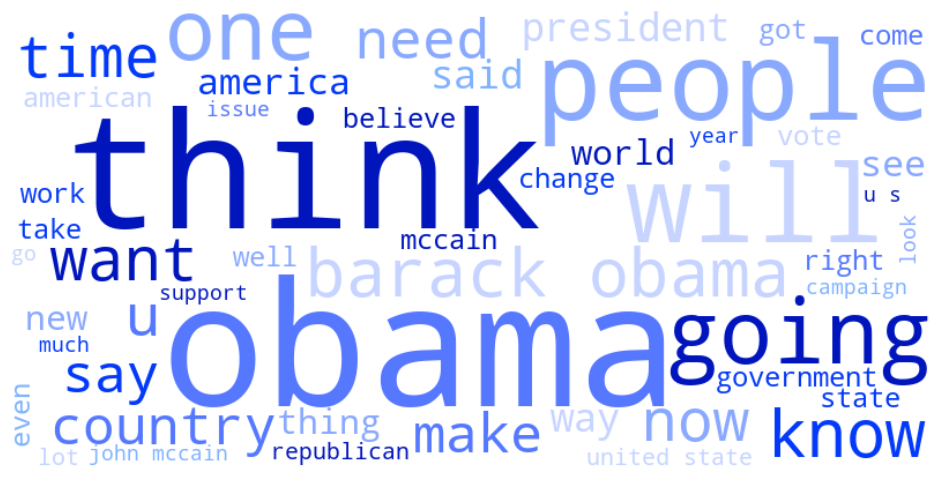

<Figure size 640x480 with 0 Axes>

In [2]:
# Import necessary packages
import pickle
import networkx as nx
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

#load Obama graph
with open(f"obama_and_largest_conn_components/Obama.pickle", "rb") as file:
    G = pickle.load(file)
    
# Get all "key phrases" node attribute values
key_phrases_obama = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_obama = list(set([phrase for phrases in key_phrases_obama for phrase in phrases]))
print(key_phrases_obama[:10])

flattened_string_obama = ' '.join(key_phrases_obama)

colors = ['#0015bc', '#0339f8', '#5578ff', '#89a9ff', '#c6d4ff', '#80b3ff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_obama)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("visuals_for_website/obama_wordcloud.png", dpi=400)

["i don't see any method at all sir", "one thing seems certain it isn't helping john mccain"]


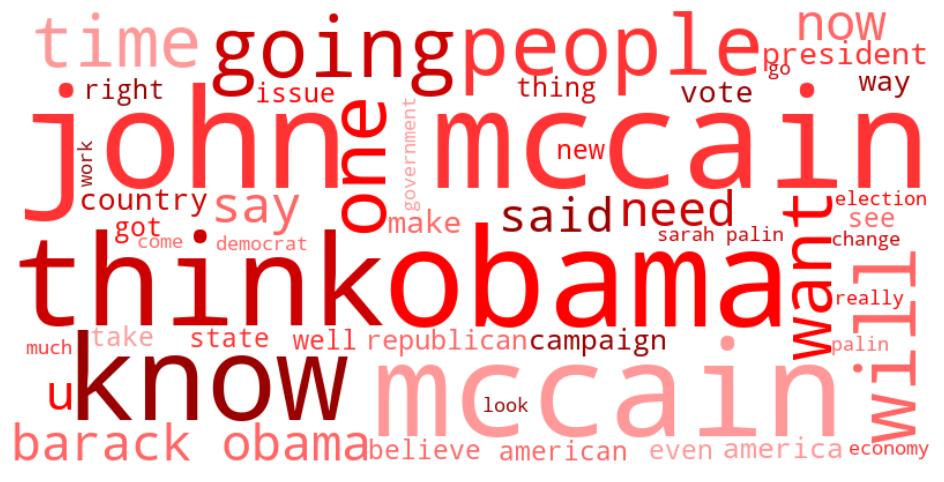

<Figure size 640x480 with 0 Axes>

In [3]:
with open('mccain_subgraph.pickle', 'rb') as file:
    G = pickle.load(file)
    
# Get all "key phrases" node attribute values
key_phrases_mccain = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_mccain = list(set([phrase.lower() for phrases in key_phrases_mccain for phrase in phrases]))
print(key_phrases_mccain[:2])

flattened_string_mccain = ' '.join(key_phrases_mccain)

# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

colors = ['#ff0000', '#990000', '#cc0000', '#ff3333', '#ff6666', '#ff9999']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_mccain)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("visuals_for_website/mccain_wordcloud.png", dpi=400)

## Word cloud of largest communities

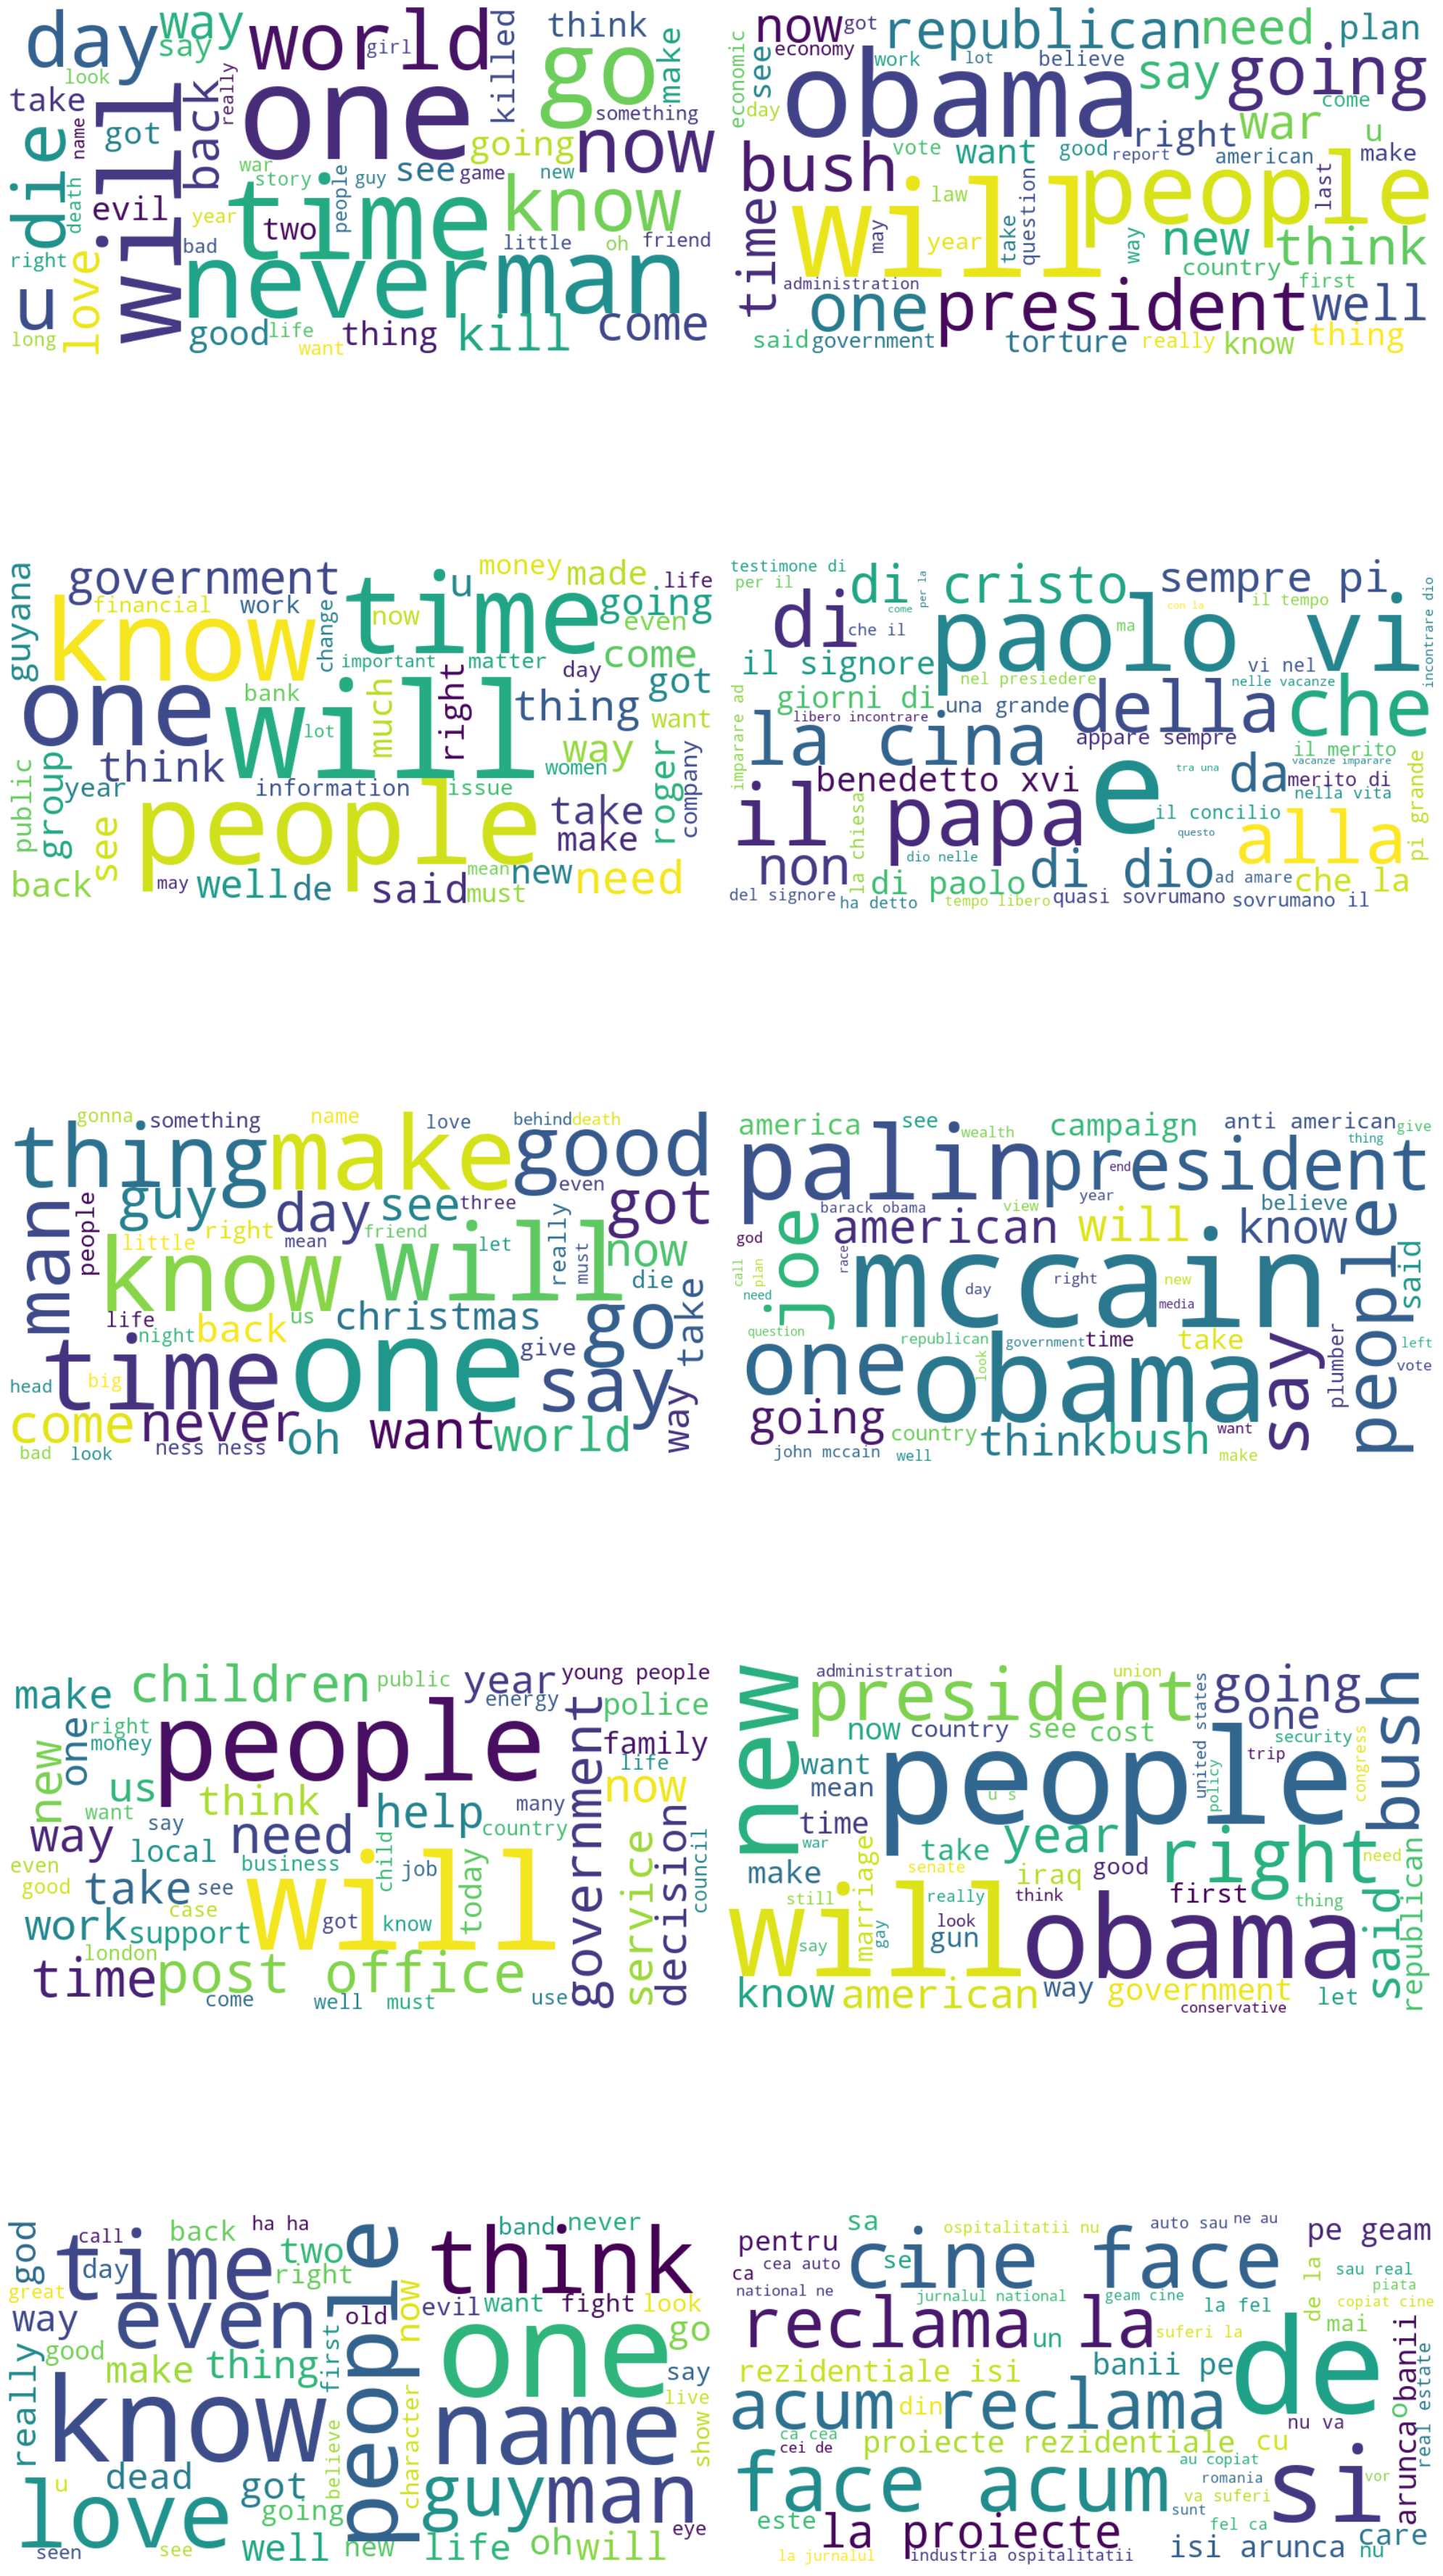

In [4]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to load a network from a pickle file
def load_network_from_pickle(filename):
    with open(filename, "rb") as file:
        network = pickle.load(file)
    return network

# Create a function to generate word clouds
def generate_wordcloud(subgraph, index):
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white',
                          min_font_size=10, max_font_size=150).generate(flattened_string)

    plt.subplot(5, 2, index + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(f"Word Cloud for Community {index + 1}")
    plt.savefig(f"visuals_for_website/community{i}_wordcloud.png", dpi=400)

# Load networks from pickle files and generate word clouds
plt.figure(figsize=(20, 40))
for i in range(1, 11):
    filename = f"obama_and_largest_conn_components/community{i}.pickle"
    G = load_network_from_pickle(filename)
    generate_wordcloud(G, i - 1)

plt.tight_layout()
plt.show()